# **chapter 8.신경망,딥러닝의 응용(필기체 숫자 인식)**

# **8.1 MNIST 데이터베이스**

In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


다운로드 받은 데이터셋 설명
*  60000개의 훈련용데이터 /10000개의 테스트용 데이터
* x_train은 60000*28*28의 배열 변수, 각 요소는 0~255값을 갖는 정수
-i번째 이미지는 x[i::]명령으로 꺼낼 수 있음
-y_train의 각 요소는 0~9의 값을 취함, 길이가 60000인 1차원 변수
-y[i]에는 이미지 i에 대응하는 0~9값이 포함

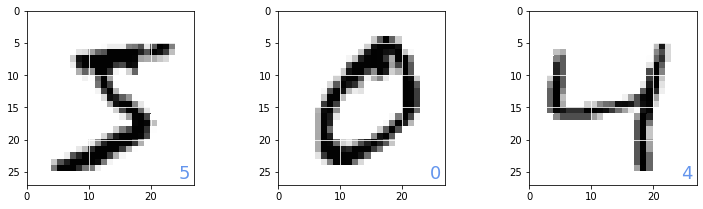

In [2]:
# - 리스트 8-1-(2)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id],
             color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color='white')
plt.show()

x_train에 저장된 처음 3개의 이미지 표시

# **8.2 2층 피드 포워드 네트워크 모델**

In [3]:
from keras.utils import np_utils
#이 네트워크는 28*28 이미지 데이터를 784 길이의 벡터로 처리
x_train = x_train.reshape(60000, 784) #60000*28*28의 배열을 60000*784 의 배열로 변환
x_train = x_train.astype('float32') #입력을 실수로 처리하고 싶음->int를 float으로 변환
x_train = x_train / 255 #변환한 값을 255로 나눔
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes) #케라스 함수를 사용해 1-of-K 부호화법으로 변경

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

**네트워크모델을 만들려면 생각해보아야하는것**
*  입력=784벡터
-네트워크의 출력층은 10개의 숫자를 분류해야함->10개의 뉴런으로 설정
-각 뉴런의 출력값이 확률을 나타내도록, 활성화함수는 소프트맥스를 사용
-입력과 출력을 연결하는 층은 16개로 설정
-활성화함수는=시그모이드

In [5]:
np.random.seed(1)
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


model = Sequential() #모델을 시퀀셜로 정의
model.add(Dense(16, input_dim=784, activation='sigmoid')) #784차원입력을 가지는 16개의 중간층
model.add(Dense(10, activation='softmax')) #10개의 출력층
model.compile(loss='categorical_crossentropy',
optimizer=Adam(), metrics=['accuracy']) #옵티마이저=adam

In [6]:
#학습
import time
startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                    verbose=1, validation_data=(x_test, y_test)) #verbose=1로 설정해 매 시기의 학습 평가치 표시
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 1.9778 - accuracy: 0.4814 - val_loss: 1.6959 - val_accuracy: 0.6599
Epoch 2/10
60/60 [==============================] - 0s 8ms/step - loss: 1.5340 - accuracy: 0.7104 - val_loss: 1.3648 - val_accuracy: 0.7714
Epoch 3/10
60/60 [==============================] - 0s 7ms/step - loss: 1.2564 - accuracy: 0.7870 - val_loss: 1.1273 - val_accuracy: 0.8196
Epoch 4/10
60/60 [==============================] - 0s 7ms/step - loss: 1.0483 - accuracy: 0.8264 - val_loss: 0.9461 - val_accuracy: 0.8466
Epoch 5/10
60/60 [==============================] - 0s 7ms/step - loss: 0.8902 - accuracy: 0.8489 - val_loss: 0.8097 - val_accuracy: 0.8669
Epoch 6/10
60/60 [==============================] - 0s 7ms/step - loss: 0.7710 - accuracy: 0.8640 - val_loss: 0.7072 - val_accuracy: 0.8761
Epoch 7/10
60/60 [==============================] - 0s 7ms/step - loss: 0.6804 - accuracy: 0.8745 - val_loss: 0.6289 - val_accuracy: 0.8840
Epoch 8/10
60/60 [==

**batch size?**
*  지금까지는 전체 데이터셋에 대한 오차함수의 기울기를 갱신 1단계마다 매번 계산
-하지만 데이터셋이 커질경우 계산에 많은 시간 소요->데이터의 일부로 오차함수의 기울기를 계산하면 유리
-이를 "확률적 경사하강법"이라고 함
-1회 갱신에 사용하는 데이터의 크기를 정의하는게 바로 batch size!

**기존의 경사하강법과 확률적 경사하강법의 차이**
*  기존경사하강법은 local minimum problem(국소해)에 빠지면 빠져나갈수가 없었음.
-확률적 경사하강법은 '휘청거리는 효과'덕에 빠져나올 수 있음.

**batch size?epoch?**
*  훈련데이터 60000개에 batchsize를 1000으로 할 경우, 학습데이터를 모두 사용하는데 60회의 매개변수 갱신이 진행된다.=이를 1epoch이라한다.
-nb_epoch=10으로 지정하면 그 10배 이므로 600회의 매개변수 갱신이 진행된다.

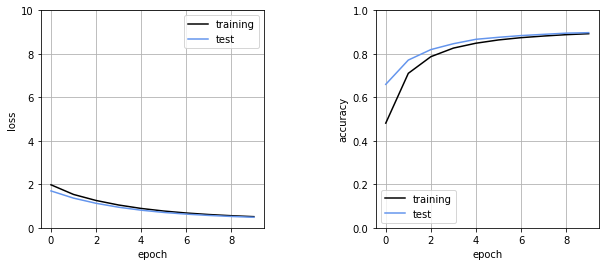

In [8]:
#2층 피드포워드 네트워크 모델의 오차와 정답률의 변화 시각화
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test',
         color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'],label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

위의 결과 해석
*  왼쪽은 상호 엔트로피 오차, 오른쪽은 정답률
*  정답률도 꾸준히 증가
*  테스트데이터의 오차가 꾸준히 줄어들고 있음->오버피팅이 일어나지않았음

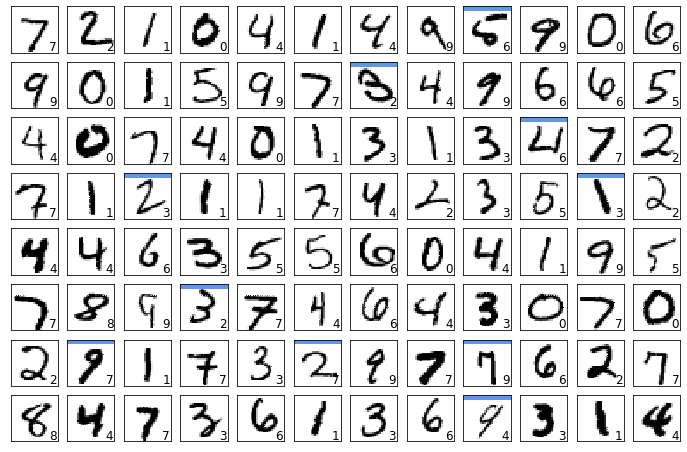

In [9]:
#실제 테스트데이터를 입력했을때->모델의 출력 확인
def show_prediction():
    n_show = 96
    y = model.predict(x_test) #x_test전체에 대한 모델의 출력 y
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
#-- 메인
show_prediction()
plt.show()

위의 결과 해석
*  잘 작동되는것처럼 보이나 잘못된 데이터가 10개 있음

# **8.3 Relu 활성화 함수**

**relu?**
*  시그모이드는 입력x가 어느정도 커지면 1, 작아지면 0을 출력해, 입력의 변화가 출력에 반영되기 어렵다.
-이렇게 되면 오차함수의 가중치매개변수에 대한 편미분이 0에 가까운 값이 되어->경사하강법의 학습이 늦어진다.
-relu를 사용하면 학습의 정체문제를 해결가능
-또한 max(0,x)로 쉽게 나타낼수있어 sigmoid에 비해 연산이 빠름.

**앞서 만든 네트워크의 중간층 활성화 함수를 relu로 바꾸어보자**

In [11]:
#sigmoid->relu->결과 정확도가 오름
import tensorflow
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu')) # (A)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 1.4672 - accuracy: 0.6072 - val_loss: 0.8018 - val_accuracy: 0.8371
Epoch 2/10
60/60 [==============================] - 0s 7ms/step - loss: 0.6182 - accuracy: 0.8594 - val_loss: 0.4763 - val_accuracy: 0.8852
Epoch 3/10
60/60 [==============================] - 0s 7ms/step - loss: 0.4366 - accuracy: 0.8890 - val_loss: 0.3820 - val_accuracy: 0.8996
Epoch 4/10
60/60 [==============================] - 0s 7ms/step - loss: 0.3682 - accuracy: 0.9024 - val_loss: 0.3362 - val_accuracy: 0.9079
Epoch 5/10
60/60 [==============================] - 0s 7ms/step - loss: 0.3302 - accuracy: 0.9113 - val_loss: 0.3089 - val_accuracy: 0.9158
Epoch 6/10
60/60 [==============================] - 0s 7ms/step - loss: 0.3054 - accuracy: 0.9168 - val_loss: 0.2897 - val_accuracy: 0.9185
Epoch 7/10
60/60 [==============================] - 0s 7ms/step - loss: 0.2876 - accuracy: 0.9214 - val_loss: 0.2772 - val_accuracy: 0.9224
Epoch 8/10
60/60 [==

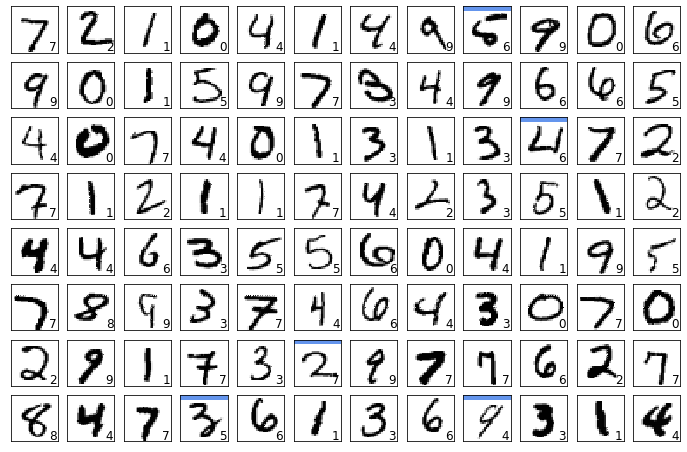

In [12]:
#테스트 데이터가 잘 인식했는지 확인하는 코드->이전보다 잘 맞춤
show_prediction()
plt.show()

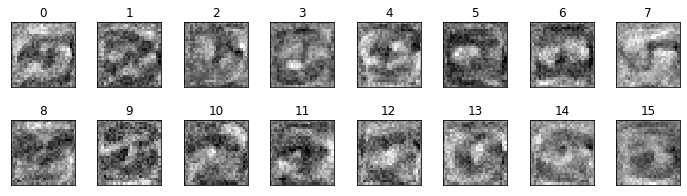

In [13]:
#우리가 만든 네트워크가 어떤 매개변수를 획득했는가?
#1층의 weights 시각화
w = model.layers[0].get_weights()[0]  #네트워크 모델의 중간층 가중치 매개변수 얻는 코드(출력층은[1]하면 얻을수있음.)
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

위의 결과
*  27*27의 입력으로부터 중간층 16개의 뉴런에 대한 가중치를 그린 그림
-가중치갑이 양수면 검은색, 음수면 흰색(검은부분에 문자 일부가 있으면 그 뉴런 활성화, 흰부분에 문자 일부가 있으면 해당뉴런 억제)
-1번 뉴런의 가중치는 희미하게 2의 형태가 검게 빛난다. 즉 이 뉴런은 2의 이미지에서 활동이 증가하는 뉴런이라고 추측할 수 있다.

**더 정확도를 올리고싶다면 어떻게 해야할까?**

*  이 모델의 이미지의 차원을 활용! 입력은 2차원 이미지라는 공간정보를 활용해야한다.

**하지만**

*  2층 피드 포워드 네트워크는 공간정보를 전혀 활용하지않는다.. 
-그저 28*28 ->784벡터로 전개해 네트워크에 입력할 뿐이다.
-공간정보를 사용하지않기 때문에, 입력순서를 바꾸더라도 전 데이터에서 규칙에 따르면, 동일하게 학습할 수 있다.(fc layer.. 모든 입력성분은 대등한 관계)

# **8.4 공간필터**

**그렇다면 공간 정보란?**
*  공간정보=모양을 나타내는 정보 ->이러한 형태를 골라내는 방법이 바로 "공간 필터"라는 이미지 처리법
-필터는 2차원 행렬로 표현  ex)3*3 필터
-이미지의 일부분과 필터의 요소를 곱한 합을 이미지를 slide 시키면서 이미지 전 영역에서 구한다. 이러한 연산을 "합성곱 연산(convolution)"이라고 한다.
-원본이미지의 위치(i,j)의 픽셀값을 x(i,j), 필터를 h(i,j)라고 하면 합성곱 연산에서 얻어지는 g(i,j)값은 다음과 같다.

$$g(i,j)=\sum_{u=-1}^{1}\sum_{v=-1}^{1} x(i+u,j+v)h(u+1,v+1)$$

*  필터의 크기는 3 *3 ,5 *5 ,7 *7 등 중심을 결정할 수 있는 홀수가 주로  쓰인다.

<br/>

**실제 필기체 숫자에 합성곱 연산을 해보자!**
*  이미지 데이터를 1->2로 바꾸기 위해 메모리 초기화

In [14]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [15]:
#이번에는 입력데이터를 data index * 28*28로 그대로 사용
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

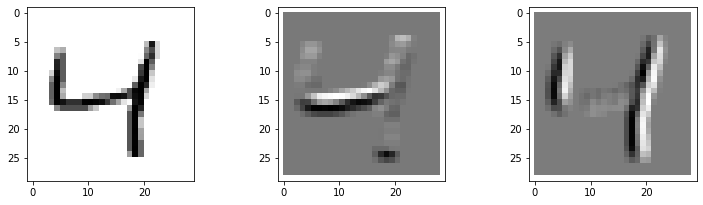

In [16]:
#가로 및 세로 edge를 강조하는 2개의 필터를 적용
import matplotlib.pyplot as plt
%matplotlib inline


id_img = 2
myfil1 = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [-2, -2, -2]], dtype=float) #첫번째 필터 정의
myfil2 = np.array([[-2, 1, 1],
                   [-2, 1, 1],
                   [-2, 1, 1]], dtype=float) #두번째 필터 정의

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# 필터 처리
for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), myfil2.reshape(-1)) 

# - 표시
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

위 결과 해석
*  훈련데이터의 2번째 데이터인 4에 필터 적용
-가로세로의 edge를 강조하는 것 이외에도, 필터의 수치를 바꾸는것으로 대각선강조,이미지 스무딩, 세부부분 강조 등의 처리방법이 있다.
-위 코드의 필터는 모든 요소를 합하면 0이 되도록 설정 되어있다.->이러면 공간 구조가 없는 균일한 부분은 0을 변환, 구조가 존재하면 0이상의 값으로 변한되어 0을 하나의 기준점으로 잡을수 있어 편리하다.
-하지만 필터를 적용하면 출력 이미지의 크기가 작아진다는 단점-> 이를 극복하기 위해 padding이라는 방법이 있음

**패딩?**
*  필터를 적용하기전에 0등의 고정된 요소로 주위를 부풀려두는 방법이다.
-3*3 일때는 폭 1인 패딩, 5*5일때는 폭 2인 패딩이 유리

**stride?**
*  필터의 간격 1칸,2칸,3칸
- stride가 크면 출력이미지가 작아짐/작으면 커짐

위의 패딩과 스트라이드 값은 라이브러리로 합성곱네트워크 사용시 인수로 전달된다!


# **8.5 합성곱 신경망**


**필터를 사용한 신경망=CNN**
*   필터에 적용하는 수치 따라 다양한 이미지 처리가 가능->CNN은 우선 필터 자체를 학습
*   필터 8장을 사용한 간단한 CNN을 만들어보자
-크기 3*3,패딩1,스트라이트1 의 필터 8장을 적용
-한장의 필터 출력은 28*28이기 때문에 28*28*8=>3차원 배열이다.
-이를 1차원인 길이 6272인 배열로 전개->fc layer로 10개의 출력층 뉴런에 결합한다.



In [18]:
#위의 조건을 담은 코드
import numpy as np
import tensorflow
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same',
                 input_shape=(28, 28, 1), activation='relu')) # (A)
model.add(Flatten()) # (B)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 11s 175ms/step - loss: 0.7928 - accuracy: 0.7999 - val_loss: 0.3398 - val_accuracy: 0.9052
Epoch 2/20
60/60 [==============================] - 12s 203ms/step - loss: 0.3113 - accuracy: 0.9101 - val_loss: 0.2652 - val_accuracy: 0.9233
Epoch 3/20
60/60 [==============================] - 13s 209ms/step - loss: 0.2545 - accuracy: 0.9281 - val_loss: 0.2276 - val_accuracy: 0.9372
Epoch 4/20
60/60 [==============================] - 10s 173ms/step - loss: 0.2175 - accuracy: 0.9386 - val_loss: 0.1968 - val_accuracy: 0.9443
Epoch 5/20
60/60 [==============================] - 11s 184ms/step - loss: 0.1899 - accuracy: 0.9473 - val_loss: 0.1748 - val_accuracy: 0.9501
Epoch 6/20
60/60 [==============================] - 10s 173ms/step - loss: 0.1679 - accuracy: 0.9539 - val_loss: 0.1563 - val_accuracy: 0.9578
Epoch 7/20
60/60 [==============================] - 14s 237ms/step - loss: 0.1506 - accuracy: 0.9589 - val_loss: 0.1472 - val_accuracy: 0.9602

In [19]:
#에러 막기 위한 재정의
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

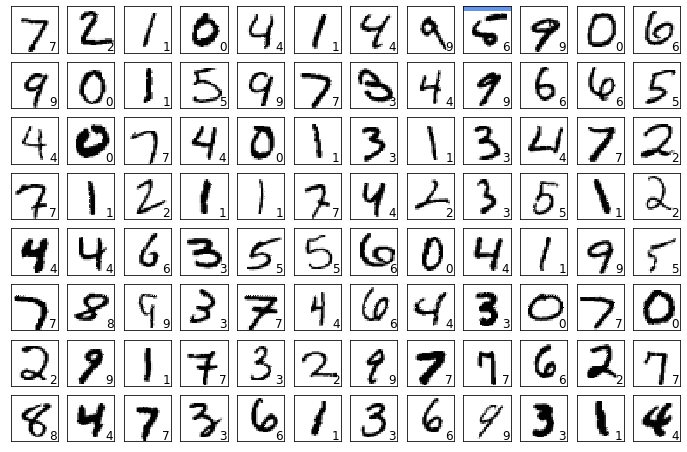

In [20]:
#테스트데이터 예측 예시 시각화
show_prediction()
plt.show()

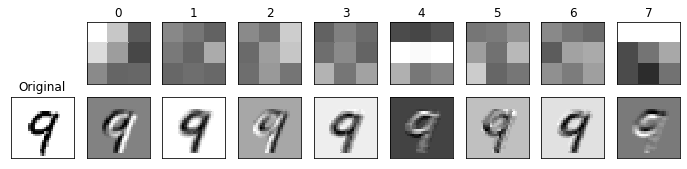

In [21]:
#학습에서 획득한 8장의 필터를 그리는 코드
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")


w = model.layers[0].get_weights()[0] # (A)
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    # 필터 처리
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

위 결과 해석
*  2층 합성곱 네트워크의 학습에서 얻은 필터와 적용한 이미지의 출력
-숫자 9의 이미지에 각 필터를 적용한 이미지
-작은값은 흰색, 큰값은 검은색으로 나타남

# **8.6 풀링**

**CNN이 이미지 인식할때 중요한것: 바로 이미지의 위치가 어긋나더라도 성능이 견고한가?**

*  1픽셀만 어긋나도 수치는 바로 달라진다.->우리눈에는 비슷하지만 네트워크는 완전 다른 패턴으로 인식한다.
-이 문제를 해결하기 위한 방법 "풀링"

2*2 max pooling을 예시로 들어보자
*  입력이미지 내 2*2의 작은 영역에서 가장 큰 값을 출력한다. 그리고 작은 공간은 스트라이드 2로 이동해 동일한 처리를 반복한다.->이결과 가로세로 크기는 기존 입력 이미지의 절반이 된다.

1.이미지를 넣는다.2*2 max pooling 진행.

2.크기가 작아져서 출력된다.

3.어긋난 이미지(1픽셀)를 넣는다.2*2 max pooling 진행.

4.역시 크기가 자강져서 출력, max pooling 으로 인해 비슷한 출력이 된다. 이를 **어긋남에 대해 견고함을 가진다** 볼수있다.

**max pooling 만있나?**
*  average pooling이라고 작은 영역의 수치의 평균을 출력값으로 하는 풀링이 있다.
-또한 영역은 2*2 뿐만아니라, 3*3,4*4 임의로 크기를 결정할 수 있다.
-보통 3*3에는 3 스트라이드, 4*4에는 4 스트라이드 이렇게 풀링의 크기와 스트라이드의 크기를 같이한다.

# **8.7 드롭아웃**

**네트워크의 학습을 개선하는 방법중 하나 "드롭아웃(drop out)"**
*  학습시 입력층의 융닛과 중간층뉴런을 확률 p(p<1)로 선택하여 나머지를 무효화 시킴
-무효화된 뉴런은 존재하지않는 것으로 취급->학습을 갱신
-매 미니배치마다 뉴런을 뽑아 이 과정을 반복

**학습 후 예측하는 경우에는 "모든뉴런"이 사용된다.**
*  학습시에는 p의 비율의 뉴런만 존재한 상태에서 학습
-예측 시 모든 뉴런을 넣으면 출력이 매우 커진다.
-따라서 예측시에는 한 층의 출력대상의 가중치를 p배로 하여 줄인다.

**drop 왜 사용? dropout의 효과**

여러 네트워크를 각각 학습시켜 예측할때 네트워크를 "평균화"해서 합치는 효과가 있음.

# **8.8 MNIST 인식 네트워크 모델**

**앞서배운 합성곱네트워크에 풀링과 드롭아웃을 도입해 계층수를 늘린 네트워크를 구축하자**
*  1층,2층 합성곱

1층 합성곱=16개의 필터 

따라서 출력은 28 * 28 의 이미지가 16장이 된다->28 * 28 * 16 차원의 3차원 데이터 배열

2층 합성곱->1층의 3차원 배열 데이터에 대해 수행

3* 3 *16의 크기를 가지는 필터가 32개 있는 2층->따라서 필터를 정의하는 매개변수의 수 3 * 3 * 16 * 32(bias 제외)

*  3층 2*2 맥스풀링층

가로와 세로의 크기는 28의 절반인 14 * 14 가 된다.

*  4층 합성곱 필터 수 64 =>매개변수의 수 3 * 3 * 32 * 64
*  5층 맥스출링으로 인해 14의 절반인 7 * 7 가 된다.
*  6층 128개의 fc
*  7층 출력이 10개인 fc가 된다.

In [23]:
#네트워크
import tensorflow
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(16, (3, 3),
                 input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #최대풀링층,MaxPooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #최대풀링층,MaxPooling
model.add(Dropout(0.25)) #Dropout층,0.25는 남은 뉴런의미
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) #Dropout층,0.25는 남은 뉴런의미
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


startTime = time.time()


history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))


Epoch 1/20
60/60 [==============================] - 71s 1s/step - loss: 0.6889 - accuracy: 0.7903 - val_loss: 0.1243 - val_accuracy: 0.9628
Epoch 2/20
60/60 [==============================] - 69s 1s/step - loss: 0.1360 - accuracy: 0.9586 - val_loss: 0.0644 - val_accuracy: 0.9795
Epoch 3/20
60/60 [==============================] - 69s 1s/step - loss: 0.0904 - accuracy: 0.9725 - val_loss: 0.0476 - val_accuracy: 0.9849
Epoch 4/20
60/60 [==============================] - 69s 1s/step - loss: 0.0706 - accuracy: 0.9787 - val_loss: 0.0384 - val_accuracy: 0.9878
Epoch 5/20
60/60 [==============================] - 79s 1s/step - loss: 0.0596 - accuracy: 0.9818 - val_loss: 0.0332 - val_accuracy: 0.9895
Epoch 6/20
60/60 [==============================] - 71s 1s/step - loss: 0.0486 - accuracy: 0.9848 - val_loss: 0.0321 - val_accuracy: 0.9900
Epoch 7/20
60/60 [==============================] - 69s 1s/step - loss: 0.0438 - accuracy: 0.9863 - val_loss: 0.0292 - val_accuracy: 0.9911
Epoch 8/20
60/60 [==

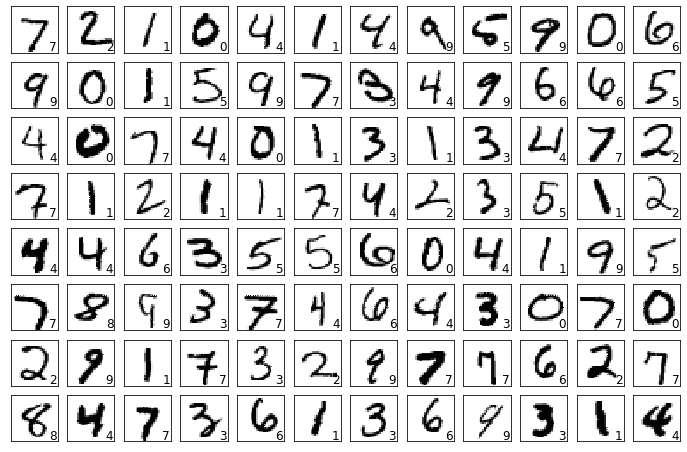

In [24]:
#테스트 데이터의 예측 예시
show_prediction()
plt.show()

위 결과 해석
*  앞서 배운 모든 기술을 네트워크에 넣었기 때문에 가장 좋은 결과가 나옴.(만족할만한 정확도!)